In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/OnlineRetail.xlsx"
df = pd.read_excel(file_name, sheet_name='Online Retail')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df[df.Quantity <0].shape

(10624, 8)

In [8]:
# We remove Quantity that less than 0 (Possibly returned items)
df = df[df.Quantity >0]


In [9]:
df[df.UnitPrice < 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [10]:
# Remove blank customer IDs
df = df[pd.notnull(df.CustomerID)]

In [11]:
# View our data range
print('Date range: %s to %s'%(df.InvoiceDate.min(), df.InvoiceDate.max()))

Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [12]:
# Taking all of transaction that occurred before 2011-12-01
df = df[df.InvoiceDate < "2011-12-01"]

In [13]:
# Create a Sales Revenue column
df['Sales'] = df.Quantity*df.UnitPrice

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
# Get a order summary dataset that shows the total in sales made per customer ID  
order_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales':sum, 'InvoiceDate': max})
order_df 

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

In [16]:
# Create some simple function we'll be using create our summary dataframe

def groupby_mean(x):
  return x.mean()

def groupby_count(x):
  return x.count()

def groupby_duration(x):
  return (x.max() - x.min()).days

def avg_frequency(x):
  return (x.max() - x.min()).days/x.count()

groupby_count.__name__ = 'count'
groupby_mean.__name__ = 'avg'
groupby_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'


In [17]:
  summary_df = order_df.reset_index().groupby('CustomerID').agg({
      'Sales': [min, max, sum, groupby_mean, groupby_count],
      'InvoiceDate': [min, max, groupby_duration, avg_frequency]
  })

In [18]:
summary_df.head(10)

Sales            ...       InvoiceDate                   
                 min       max  ... purchase_duration purchase_frequency
CustomerID                      ...                                     
12346.0     77183.60  77183.60  ...                 0           0.000000
12347.0       382.52   1294.32  ...               327          54.500000
12348.0       227.44    892.80  ...               282          70.500000
12349.0      1757.55   1757.55  ...                 0           0.000000
12350.0       334.40    334.40  ...                 0           0.000000
12352.0       120.33    840.30  ...               260          32.500000
12353.0        89.00     89.00  ...                 0           0.000000
12354.0      1079.40   1079.40  ...                 0           0.000000
12355.0       459.40    459.40  ...                 0           0.000000
12356.0        58.35   2271.62  ...               302         100.666667

[10 rows x 9 columns]

In [19]:
# Rename our columns
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [20]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.0
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.5
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.5
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.0
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.0


## Visualization 

In [21]:
# Let's look at the first 20 sales counts and the average spend for that sale
# We first groupby Sales_count and then look at the sale_avg

summary_df.groupby('sales_count').count()['sales_avg'][0:20]

sales_count
1.0     1539
2.0      806
3.0      515
4.0      381
5.0      228
6.0      172
7.0      132
8.0       97
9.0       60
10.0      45
11.0      54
12.0      47
13.0      29
14.0      19
15.0      24
16.0      13
17.0      15
18.0      11
19.0      15
20.0      10
Name: sales_avg, dtype: int64

In [22]:
summary_df.describe()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_purchase_duration,invoicedate_purchase_frequency
count,4298.000000,4298.00000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000
mean,266.298816,613.89789,1952.818779,400.255621,4.131689,125.092369,29.437265
std,1219.631315,1747.66601,8354.913254,1271.187289,7.420253,128.908309,34.268072
min,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,95.770000,223.36000,304.305000,178.602500,1.000000,0.000000,0.000000
50%,172.175000,366.17000,657.265000,295.033958,2.000000,83.000000,20.121324
75%,310.722500,618.19250,1599.515000,431.594250,4.000000,245.000000,48.000000
max,77183.600000,77183.60000,268478.000000,77183.600000,201.000000,364.000000,182.000000


In [23]:
summary_df = summary_df[summary_df.invoicedate_purchase_duration > 0]

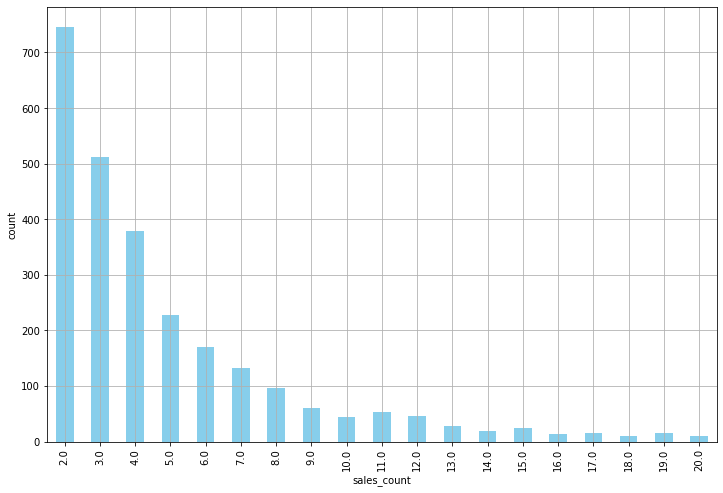

In [24]:
# We filtered on invoicedate_purchase_duration greater than 0

ax = summary_df.groupby('sales_count').count()['sales_avg'][0:20].plot.bar(color='skyblue', figsize=(12,8), grid=True)
ax.set_ylabel('count')

plt.show()

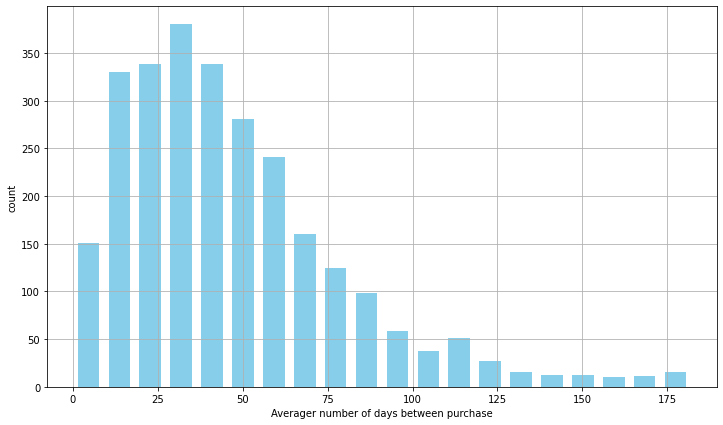

In [25]:
# Now we create a distribution for the average times between sales

ax = summary_df['invoicedate_purchase_frequency'].hist(bins =20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_ylabel("count")
ax.set_xlabel("Averager number of days between purchase")
plt.show()

## Predicting the 3 month Customer Lifetime Value

In [29]:
order_df.head(10)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00
           548955       367.00 2011-04-05 10:47:00

In [30]:
# Create summary statistics in 3 month intervals for customer Sales
# Use 3M for 3 month
clv_freq = '3M'

#  Group customer ID now, and group all invoices for 3 month cycles
#  Aggrerate on sum, mean and counts

data_df = order_df.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean,  groupby_count]})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0
5,12347.0,2011-12-31,1294.32,1294.320,1.0
6,12348.0,2010-12-31,892.80,892.800,1.0
7,12348.0,2011-03-31,227.44,227.440,1.0
8,12348.0,2011-06-30,367.00,367.000,1.0
9,12348.0,2011-09-30,310.00,310.000,1.0


In [33]:
#  Adding Recency M
# Get the M

date_month_map = {str(x)[:10]: "M_%s" % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M column
data_df['M'] = data_df["InvoiceDate"].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1.0,M_1
6,12348.0,2010-12-31,892.80,892.800,1.0,M_5
7,12348.0,2011-03-31,227.44,227.440,1.0,M_4
8,12348.0,2011-06-30,367.00,367.000,1.0,M_3
9,12348.0,2011-09-30,310.00,310.000,1.0,M_2


In [34]:
data_df['M'].unique()

array(['M_4', 'M_5', 'M_3', 'M_2', 'M_1'], dtype=object)

**RFM**

By definition, RFM represents:

- R(ecency): how recently did customer purchase?
- F(rquency): how often do customer purchase?
- M(onetary Value): how much do they spend (each time on average)?

In [35]:
# Create our Feature DF
feature_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

feature_df.columns = ['_'.join(col) for col in feature_df.columns]

feature_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [36]:
# Create our Respond DF
response_df = data_df.loc[data_df['M'] == "M_1", ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [38]:
# Create our Sample Set by merging features with response_df
sample_set_df = feature_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()  

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


# Using Linear Regression

In [40]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable 
target_var = "CLV_"+clv_freq

# Our features
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

# Split  data in Train and Test
X_train, X_test, y_train, y_test =  train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

# Fit model
reg_fit =  LinearRegression()
reg_fit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Get our y intercept
reg_fit.intercept_

40.07492809391357

In [42]:
# Get our coefficents
reg_fit.coef_

array([   0.26236976,   -0.6120016 ,    0.65996841,   -0.70220061,
         75.19545281,   12.26633876, -122.85317708, -154.33926352,
          0.16922155,    0.37855086,    0.16912436,    1.16367585])

In [43]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.262370
1,sales_avg_M_3,-0.612002
2,sales_avg_M_4,0.659968
3,sales_avg_M_5,-0.702201
4,sales_count_M_2,75.195453
5,sales_count_M_3,12.266339
6,sales_count_M_4,-122.853177
7,sales_count_M_5,-154.339264
8,sales_sum_M_2,0.169222
9,sales_sum_M_3,0.378551


In [44]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(X_train)
test_preds = reg_fit.predict(X_test)



In [45]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.7494532759938614
207.18965959834705


In [46]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.7495
Out-of-Sample R-Squared: -1.0202


In [47]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 207.1897
Out-of-Sample MSE: 216.2435


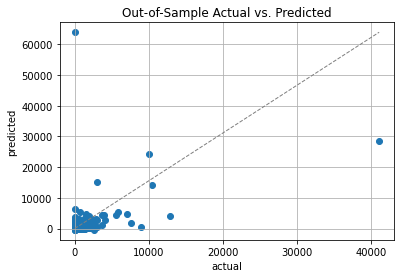

In [48]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()